In [1]:
import numpy as np
from sklearn import datasets, metrics, svm
import matplotlib.pyplot as plt
%matplotlib inline

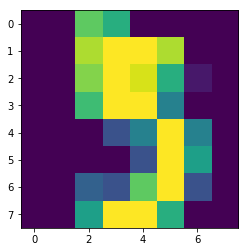

In [4]:
x,y = datasets.load_digits(return_X_y=True)
img = x[5].reshape(8,8)
plt.imshow(img)

In [5]:
n_data = len(y)
x_train, x_test = x[:3*n_data//4], x[-n_data//4:]
y_train, y_test = y[:3*n_data//4], y[-n_data//4:]
print(len(y_train), len(y_test))

1347 450


In [19]:
def pca(data, num_comp):
    mean = data.mean(axis=0)
    stdev = data.std(axis=0)
    #std data
    std_data = (data - mean) / (stdev + 1e-16)
    #count cov mat
    cov_mat = np.cov(data.T)
    #count eig-vec , eig_val
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    #sort
    order = np.argsort(np.abs(eig_val))
    eig_vec = eig_vec[order]
    princ_comps = eig_vec[-num_comp:]
    return mean, stdev, princ_comps

In [13]:
mean, stdev, pc = pca(x_train,2)
pc.shape

(2, 64)

In [16]:
red_x_train = (x_train - mean) / (stdev + 1e-16) @pc.T
red_x_train.shape

(1347, 2)

In [18]:
mean, stdev, pc = pca(x_train,8)
red_x_train = (x_train - mean) / (stdev + 1e-16) @pc.T
red_x_train.shape

(1347, 8)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(x_train)
trans_x_train = pca.transform(x_train)

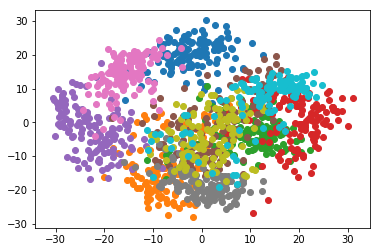

In [48]:
for i in range(10):
    d = trans_x_train[np.where(y_train == i)]
    plt.scatter(d[:,0], d[:,1])

In [49]:
svm_classifier = svm.SVC(degree=3)
svm_classifier.fit(trans_x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
trans_x_test = pca.transform(x_test)
pred = svm_classifier.predict(trans_x_test)
report = metrics.classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.61      0.50      0.55        46
           2       0.61      0.63      0.62        43
           3       0.72      0.49      0.58        47
           4       0.74      0.88      0.80        48
           5       0.33      0.36      0.34        45
           6       0.79      0.64      0.71        47
           7       0.58      0.64      0.61        45
           8       0.31      0.39      0.35        41
           9       0.56      0.60      0.58        45

   micro avg       0.60      0.60      0.60       450
   macro avg       0.60      0.59      0.59       450
weighted avg       0.61      0.60      0.60       450



In [57]:
from sklearn.manifold import TSNE
pc_tsne = PCA(16)
tsne = TSNE(n_components=2, perplexity=10, learning_rate=2, n_iter=500)
pc_tsne.fit(x)
x_trans = pc_tsne.transform(x)
embed_x = tsne.fit_transform(x_trans)

In [58]:
embed_x_train, embed_x_test = embed_x[:3*n_data//4], embed_x[-n_data//4:]

In [59]:
svm_classifier = svm.SVC(degree=3)
svm_classifier.fit(embed_x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
pred = svm_classifier.predict(embed_x_test)
report = metrics.classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        43
           3       0.98      0.96      0.97        47
           4       0.98      0.94      0.96        48
           5       0.92      0.98      0.95        45
           6       0.98      1.00      0.99        47
           7       0.94      1.00      0.97        45
           8       1.00      0.98      0.99        41
           9       1.00      0.93      0.97        45

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



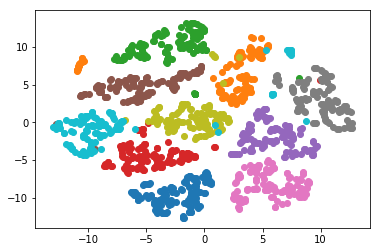

In [61]:
for i in range(10):
    d = embed_x[np.where(y_train == i)]
    plt.scatter(d[:,0], d[:,1])